<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### **Download Kaggle Dataset** 

In [ ]:
# Install kaggle python library
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Note that you need to create `New API Token` from your `Kaggle` account and upload it into a folder created for the data. In this example, I put downloaded `json` file into a folder called `Data`. 

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/Colab Notebooks/Sentiment Analysis/Data'

In [5]:
# changing the working directory
%cd '/gdrive/MyDrive/Colab Notebooks/Sentiment Analysis/Data'

/gdrive/MyDrive/Colab Notebooks/Sentiment Analysis/Data


In [6]:
# checking the current working directory
!pwd

/gdrive/MyDrive/Colab Notebooks/Sentiment Analysis/Data


Open Kaggle link in which the dataset was located, `Copy API command` and paste the cell below after `!`

In [7]:
!kaggle datasets download -d deadskull7/fer2013

 90% 87.0M/96.6M [00:00<00:00, 164MB/s]
100% 96.6M/96.6M [00:00<00:00, 168MB/s]


In [8]:
!unzip \*.zip && rm *.zip

Archive:  fer2013.zip
  inflating: fer2013.csv             


### **Prepare Data**

In [9]:
!ls

fer2013.csv  kaggle.json


In [10]:
data = pd.read_csv('fer2013.csv')

In [11]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [12]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

#### **Split Data into Train and Test**

In [13]:
train_data = data[data.Usage=='Training']

In [14]:
train_data_pixels = train_data.pixels

In [15]:
train_data_pixels = train_data_pixels.str.split(" ").tolist()

In [ ]:
train_data_pixels = pd.DataFrame(train_data_pixels, dtype=int)

In [17]:
train_data_image = train_data_pixels.values

In [ ]:
train_data_image.astype(np.float)

In [ ]:
test_data = data[data.Usage=='PublicTest']
test_data_pixels = test_data.pixels
test_data_pixels = test_data_pixels.str.split(" ").tolist()
test_data_pixels = pd.DataFrame(test_data_pixels, dtype=int)
test_data_image = test_data_pixels.values
test_data_image.astype(np.float)

#### **Targets**
For training data

In [20]:
# Find number of targets/labels/class
num_class = len(np.unique(data.emotion.values))

In [21]:
train_labels = train_data["emotion"]

In [22]:
train_labels = train_labels.values

We apply one-hot coding to use softmax in the model to do prediction for each class.

In [23]:
import tensorflow.keras as keras
train_labels = keras.utils.to_categorical(train_labels, num_class)

In [24]:
train_labels.shape

(28709, 7)

For test data

In [25]:
test_labels = test_data["emotion"]
test_labels = test_labels.values
test_labels = keras.utils.to_categorical(test_labels, num_class)

In [26]:
test_labels.shape

(3589, 7)

**Summary of dataset**

`train_data_image`: train data (28709, 2304)

`test_data_image`: test data (3589, 2304)

`train_labels`: train labels (28709, 7)

`test_labels`: test labels (3589, 7)

In [27]:
train_data_image.shape

(28709, 2304)

In [28]:
# Reshape train data to make (Number of samples, 48, 48)
train_image = np.zeros((train_data_image.shape[0],48,48))
for i in range(train_data_image.shape[0]):
  train_image[i,:,:] = train_data_image[i].reshape(48,48)

In [29]:
train_image.shape

(28709, 48, 48)

In [30]:
test_data_image.shape

(3589, 2304)

In [31]:
# Reshape test data to make (Number of samples, 48, 48)
test_image = np.zeros((test_data_image.shape[0],48,48))
for i in range(test_data_image.shape[0]):
  test_image[i,:,:] = test_data_image[i].reshape(48,48)

In [32]:
test_image.shape

(3589, 48, 48)

In [33]:
train_labels.shape

(28709, 7)

In [34]:
test_labels.shape

(3589, 7)

**Summary of dataset after reshaping both train and test data**

`train_image`: train data (28709, 48, 48)

`test_image`: test data (3589, 48, 48)

`train_labels`: train labels (28709, 7)

`test_labels`: test labels (3589, 7)

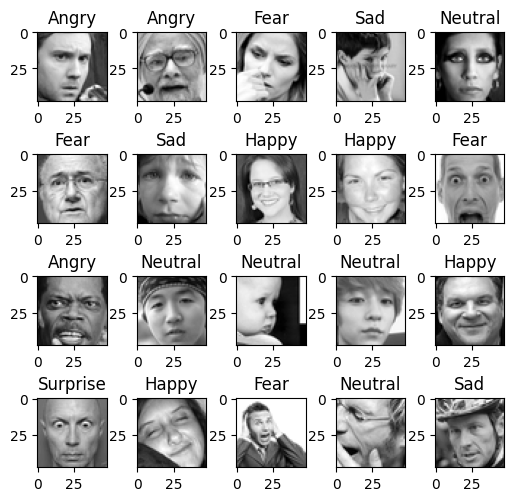

In [35]:
fig = plt.figure(figsize=(5,5))
labels_class = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
for k in range(20):
  fig.add_subplot(4,5,k+1)
  plt.imshow(train_image[k,:,:], cmap='gray')
  label = np.where(train_labels[k]==1)
  num_label = label[0][0]
  plt.title(f'{labels_class[num_label]}')
  fig.tight_layout(pad=0.2)

See number of images in training and test sets

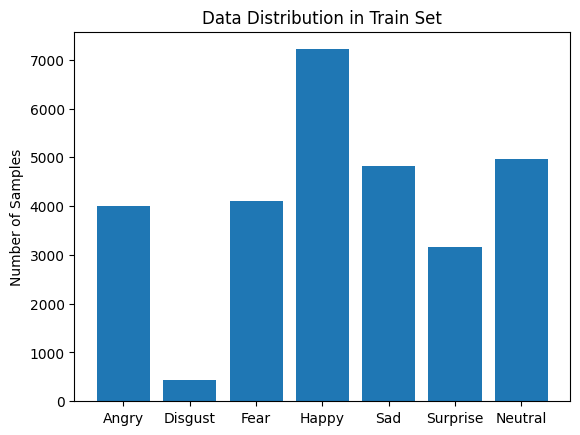

In [36]:
emotions = train_data.emotion.values
num_emotions = len(np.unique(emotions))
number_class = np.zeros(num_emotions)
for i in range(num_emotions):
  number_class[i] = len(np.where(emotions==i)[0])
plt.figure()
plt.bar(labels_class,number_class)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Train Set')
plt.show()

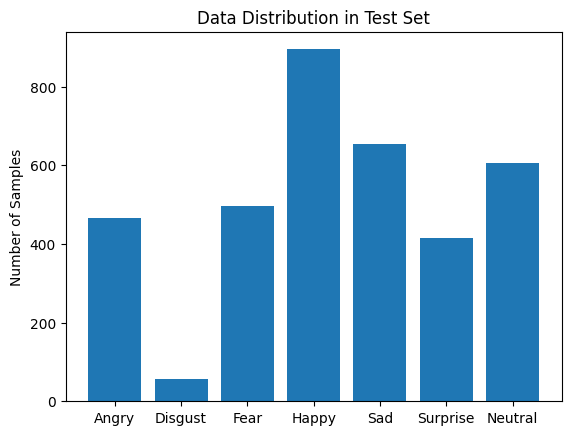

In [37]:
emotions_test = test_data.emotion.values
num_emotions_test = len(np.unique(emotions_test))
number_class_test = np.zeros(num_emotions_test)
for i in range(num_emotions_test):
  number_class_test[i] = len(np.where(emotions_test==i)[0])
plt.figure()
plt.bar(labels_class,number_class_test)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Test Set')
plt.show()

As seen, the images of disgust emotion is very less. Therefore, we fit the number of other classes to 3000 in training dataset and to 300 in the test dataset.

In [38]:
train_labels.shape

(28709, 7)

In [39]:
import random
labels = np.array([[1,0,0,0,0,0,0],
                   [0,1,0,0,0,0,0],
                   [0,0,1,0,0,0,0],
                   [0,0,0,1,0,0,0],
                   [0,0,0,0,1,0,0],
                   [0,0,0,0,0,1,0],
                   [0,0,0,0,0,0,1]], dtype="float32")
train = np.zeros((3000*6 + len(np.where(emotions==1)[0]), 48, 48))
train_label = np.zeros((3000*6 + len(np.where(emotions==1)[0]), 7))
count = 0
for i in range(7):
  start = count
  classes = np.where(np.all(train_labels == labels[i], axis=1))[0]
  if i == 1:
    end = start + len(classes)
    print(f"start:{start}, end:{end}")
    train[start:end,:,:] = train_image[classes,:,:]
    train_label[start:end,:] = train_labels[classes,:]
  else:
    end = start + 3000
    print(f"start:{start}, end:{end}")
    train[start:end,:,:] = train_image[classes[0:3000],:,:]
    train_label[start:end,:] = train_labels[classes[0:3000],:]
  count = end

start:0, end:3000
start:3000, end:3436
start:3436, end:6436
start:6436, end:9436
start:9436, end:12436
start:12436, end:15436
start:15436, end:18436


In [40]:
train_image = train
train_labels = train_label

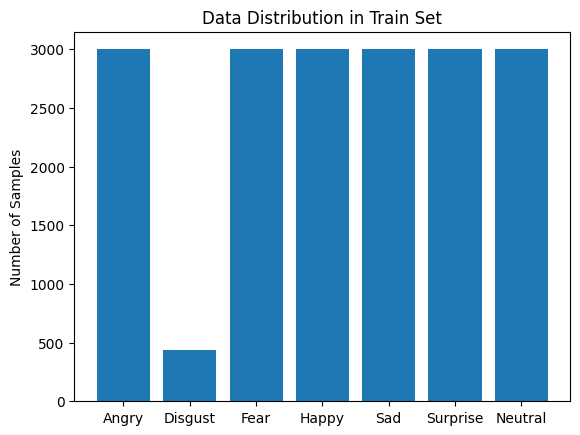

In [41]:
number_class = np.zeros(7)
for i in range(7):
  number_class[i] = len(np.where(np.all(train_labels == labels[i], axis=1))[0])

plt.figure()
plt.bar(labels_class,number_class)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Train Set')
plt.show()

In [42]:
test = np.zeros((400*6 + len(np.where(np.all(test_labels == labels[1], axis=1))[0]), 48, 48))
test_label = np.zeros((400*6 + len(np.where(np.all(test_labels == labels[1], axis=1))[0]), 7))
count = 0
for i in range(7):
  start = count
  classes = np.where(np.all(test_labels == labels[i], axis=1))[0]
  if i == 1:
    end = start + len(classes)
    print(f"start:{start}, end:{end}")
    test[start:end,:,:] = test_image[classes,:,:]
    test_label[start:end,:] = test_labels[classes,:]
  else:
    end = start + 400
    print(f"start:{start}, end:{end}")
    test[start:end,:,:] = test_image[classes[0:400],:,:]
    test_label[start:end,:] = test_labels[classes[0:400],:]
  count = end

start:0, end:400
start:400, end:456
start:456, end:856
start:856, end:1256
start:1256, end:1656
start:1656, end:2056
start:2056, end:2456


In [43]:
test_image = test
test_labels = test_label

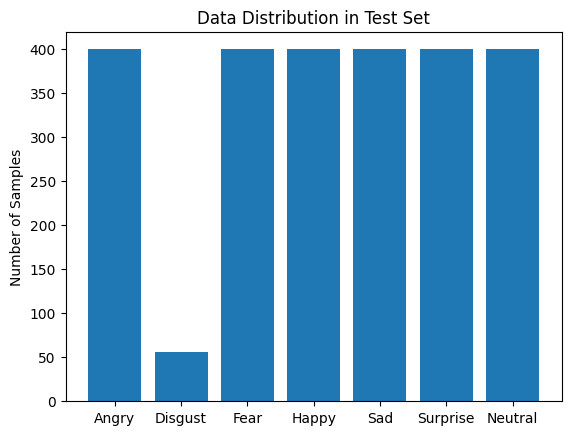

In [44]:
number_class = np.zeros(7)
for i in range(7):
  number_class[i] = len(np.where(np.all(test_labels == labels[i], axis=1))[0])

plt.figure()
plt.bar(labels_class,number_class)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Test Set')
plt.show()

In [45]:
train_image = train_image[...,np.newaxis]
test_image = test_image[...,np.newaxis]

In [46]:
# Rescale Image Pixels
train_image = (train_image-np.mean(train_image))/np.std(train_image)
test_image = (test_image-np.mean(test_image))/np.std(test_image)

In [47]:
input_shape = (train_image.shape[1],train_image.shape[2],train_image.shape[3])

In [48]:
input_shape

(48, 48, 1)

### **Convolutional Neural Network**

####**Keras API Model**

We implemented the same model of [this competitor](https://www.kaggle.com/code/anantgupt/facial-emotion-recogination-91-accuracy-train-set), as he/she has gotten a quite high accuracy.

In [49]:
import tensorflow.keras as keras
import keras.regularizers as regularizers

In [50]:
model_input = keras.Input(shape=input_shape, name='model_input')

model_conv_1 = keras.layers.Conv2D(32,
                                  kernel_size = (3,3),
                                  strides = (1,1),
                                  activation='relu',
                                  padding='same',
                                  name = 'conv_layer_1'   
                                  )(model_input)

model_conv_2 = keras.layers.Conv2D(64,
                                  kernel_size = (3,3),
                                  strides = (1,1),
                                  activation='relu',
                                  padding='same',
                                  name = 'conv_layer_2'   
                                  )(model_conv_1)

batch_1 = keras.layers.BatchNormalization(name='encoder_bn_1')(model_conv_2)

model_max_pool = keras.layers.MaxPool2D((2,2), # grid size
                                     name='max_pool_1')(batch_1)

dropout1 = keras.layers.Dropout(0.25, name='dropout1')(model_max_pool)

model_conv_3 = keras.layers.Conv2D(128,
                                  kernel_size = (3,3),
                                  strides = (1,1),
                                  activation='relu',
                                  padding='same',
                                  kernel_regularizer=regularizers.l2(0.01),
                                  name = 'conv_layer_3'   
                                  )(dropout1)

model_conv_4 = keras.layers.Conv2D(256,
                                  kernel_size = (3,3),
                                  strides = (1,1),
                                  activation='relu',
                                  kernel_regularizer=regularizers.l2(0.01),
                                  name = 'conv_layer_4'   
                                  )(model_conv_3)

batch_2 = keras.layers.BatchNormalization(name='encoder_bn_2')(model_conv_4)

model_max_pool2 = keras.layers.MaxPool2D((2,2), # grid size
                                     name='max_pool_2')(batch_2)

dropout2 = keras.layers.Dropout(0.25, name='dropout2')(model_max_pool2)

flatten1 = keras.layers.Flatten(name='flatten_1')(dropout2)

dense1 = keras.layers.Dense(1024, 
                            activation='relu', 
                            name='Dense_1')(flatten1)

dropout3 = keras.layers.Dropout(0.5, name='dropout3')(dense1)

output = keras.layers.Dense(num_emotions_test, 
                            activation='softmax', 
                            name='model_output')(dropout3)

# Make this network a model
model_API = keras.Model(model_input, output, name='conv_model_API_fer')    

In [51]:
model_API.summary()

Model: "conv_model_API_fer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_input (InputLayer)    [(None, 48, 48, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 48, 48, 32)        320       
                                                                 
 conv_layer_2 (Conv2D)       (None, 48, 48, 64)        18496     
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 48, 48, 64)       256       
 ation)                                                          
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 24, 24, 64)        0         
                                                

In [52]:
#Compiling the model
model_API.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [53]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath= 'data/face_model.h5', verbose=1, save_best_only=True)

# Training
history = model_API.fit(train_image, 
                        train_labels, 
                        validation_data=(test_image, test_labels), 
                        batch_size=100, epochs=50, 
                        shuffle=True, callbacks=[checkpointer], 
                        verbose=2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 29.48911, saving model to data/face_model.h5
185/185 - 28s - loss: 6.9673 - accuracy: 0.2496 - val_loss: 29.4891 - val_accuracy: 0.1629 - 28s/epoch - 151ms/step
Epoch 2/50

Epoch 2: val_loss improved from 29.48911 to 22.18777, saving model to data/face_model.h5
185/185 - 15s - loss: 2.8649 - accuracy: 0.3190 - val_loss: 22.1878 - val_accuracy: 0.1800 - 15s/epoch - 79ms/step
Epoch 3/50

Epoch 3: val_loss improved from 22.18777 to 6.73187, saving model to data/face_model.h5
185/185 - 13s - loss: 2.1962 - accuracy: 0.3528 - val_loss: 6.7319 - val_accuracy: 0.2866 - 13s/epoch - 70ms/step
Epoch 4/50

Epoch 4: val_loss improved from 6.73187 to 1.84573, saving model to data/face_model.h5
185/185 - 13s - loss: 1.8549 - accuracy: 0.3772 - val_loss: 1.8457 - val_accuracy: 0.3852 - 13s/epoch - 69ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 1.84573
185/185 - 11s - loss: 1.7013 - accuracy: 0.4041 - val_loss: 2.2452 - val_accuracy: 0.3

In [54]:
# save model to json
model_json = model_API.to_json()
with open('/gdrive/MyDrive/Colab Notebooks/Sentiment Analysis/Data/data/face_model.json', 'w') as json_file:
  json_file.write(model_json)

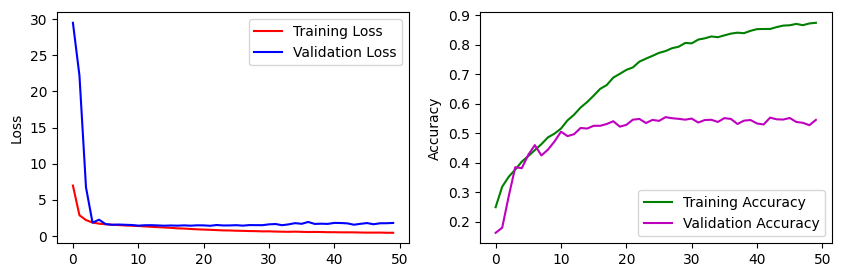

In [55]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.ylabel('Loss')
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [56]:
image_url = "https://yt3.googleusercontent.com/ytc/AL5GRJUWzuK6FB01l_NrmtdbWhgq8j4zMnb6SJyeR8ID=s900-c-k-c0x00ffffff-no-rj"

In [57]:
import requests
from io import BytesIO
image_url_resp = requests.get(image_url)
image = Image.open(BytesIO(image_url_resp.content)).convert('L') # convert to grayscale
image = image.resize((48,48))
image = np.array(image, dtype="float32") / 255.0 # normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=-1) # add an extra dimension for the single channel

print(image.shape)

(48, 48, 1)


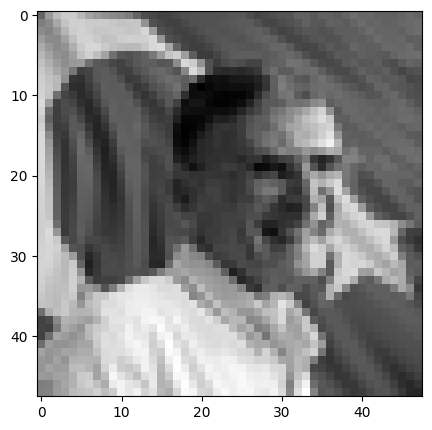

In [58]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.show()

In [59]:
image = image[np.newaxis,...]

In [60]:
prediction = model_API.predict(image)
ind = np.argmax(prediction,axis=1)
print(f"Prediction: {labels_class[ind[0]]}")

1/1 [==============================] - 0s 428ms/step
Prediction: Happy


####**Evaluate the Model with Private Dataset**

In [61]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [62]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [65]:
x_test_private = x_test_private.reshape(-1,48,48)

In [66]:
x_test_private = x_test_private[...,np.newaxis] # add the channel axis
y_test_private = keras.utils.to_categorical(y_test_private, num_class) # one-hot encoding

In [68]:
print(f"Private test data shape: {x_test_private.shape}")
print(f"Private target/label data shape: {y_test_private.shape}")

Private test data shape: (3589, 48, 48, 1)
Private target/label data shape: (3589, 7)


In [75]:
x_test_private = (x_test_private-np.mean(x_test_private))/np.std(x_test_private)

In [76]:
categorical_cross_entropy_loss, categorical_accuracy = model_API.evaluate(x_test_private, y_test_private, verbose=0)
print(f"[categorical_cross_entropy_loss:{categorical_cross_entropy_loss}, categorical_accuracy:{categorical_accuracy*100}]")

[categorical_cross_entropy_loss:1.6938530206680298, categorical_accuracy:56.47812485694885]


**Discussion:** 

Our functional model achieved a categorical accuracy of 56% on the private dataset. However, this level of accuracy may not be sufficient for real-world applications. To improve accuracy, different pre-trained models can be used, but it is important to ensure that the data shape is appropriate.

For example, the VGG-Face model can be used for sentiment analysis, but it requires images of size (224x224), which is different from the (48x48) face images used in our study. VGG-Face is a deep convolutional neural network originally designed for face recognition, but it can also detect facial expressions. The model was trained on a large dataset of face images and can identify seven basic emotions: anger, disgust, fear, happiness, sadness, surprise, and neutral.